In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('MSFT_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-04-22 01:05:08,0.0772,Intel and Microsoft face different challenges ...,0.000,0.874,0.126,0
2016-04-22 02:18:28,0.2500,"Microsoft revenue, profit misses estimates",0.244,0.385,0.372,1
2016-04-27 07:36:08,0.3612,Is India ready for the 'thinnest' laptop age?,0.000,0.737,0.263,1
2016-05-11 06:32:13,0.3612,"Are we ready for chatbots, the next technology...",0.000,0.762,0.238,1
2016-05-25 21:13:59,-0.5994,"Microsoft to cut 1,850 jobs at struggling smar...",0.412,0.588,0.000,-1
2016-05-30 07:50:04,0.0000,Microsoft seeks to empower every Indian: Satya...,0.000,1.000,0.000,0
2016-05-31 11:26:04,0.0000,Newgen Software's unique app now on Windows pl...,0.000,1.000,0.000,0
2016-06-13 10:12:03,0.0000,Microsoft launches its online store with Tata ...,0.000,1.000,0.000,0
2016-06-14 00:19:02,0.0000,Microsoft to buy LinkedIn for $26.2 billion in...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-04-22,0.1636,0.122,0.6295,0.249,0.5
2016-04-23,0.0000,0.000,0.0000,0.000,0.0
2016-04-24,0.0000,0.000,0.0000,0.000,0.0
2016-04-25,0.0000,0.000,0.0000,0.000,0.0
2016-04-26,0.0000,0.000,0.0000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.079550,0.045314,0.779814,0.097318,0.187600
std,0.127200,0.046787,0.234509,0.060783,0.270739
min,-0.668600,0.000000,0.000000,0.000000,-1.000000
25%,0.009593,0.014643,0.803656,0.069717,0.000000
50%,0.079774,0.038062,0.844356,0.095830,0.188345
75%,0.142619,0.062661,0.878601,0.126721,0.333333
max,0.844200,0.417000,1.000000,0.558000,1.000000


### Fundamental Data

In [25]:
fund = pd.read_csv('MSFT_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,1.050000e+12,10.2456,26.7185,0.016417,0.037427,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1005
1,28/06/2019,1.030000e+12,10.8992,29.6038,0.016627,0.033779,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2,27/06/2019,1.040000e+12,10.9147,29.6458,0.016604,0.033732,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
3,26/06/2019,1.030000e+12,10.8968,29.5972,0.016631,0.033787,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
4,25/06/2019,1.030000e+12,10.8561,29.4867,0.016693,0.033914,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059


In [26]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [27]:

fund.index =fund['date']

In [28]:
fund=fund.loc['2016/07/01':'2019/07/01']

In [29]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null float64
freecashflow                      754 non-null float64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null float64
currentratio                      754 non-null float64
debttoequity                      754 non-nu

### Price analysis

In [30]:
df_price = pd.read_csv('MSFT_price.csv')

In [31]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [32]:
#df_price = df_price.drop(['date'], axis=1)

In [33]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-19,0,138.41,138.550000,136.885000,137.855000,24370543.0,138.41,2019-08-19,daily,138.55,False,136.885,137.855,24370543.0
2019-08-16,1,136.13,136.460000,134.720000,134.880000,25026151.0,136.13,2019-08-16,daily,136.46,False,134.720,134.880,25026151.0
2019-08-15,2,133.68,134.580000,132.250000,134.390000,28125416.0,133.68,2019-08-15,daily,134.58,False,132.250,134.390,28125416.0
2019-08-14,3,133.98,136.920000,133.670000,136.360000,32527251.0,133.98,2019-08-14,daily,136.92,False,133.670,136.360,32527251.0
2019-08-13,4,138.14,138.339336,134.551948,135.598463,25496593.0,138.60,2019-08-13,daily,138.80,False,135.000,136.050,25496593.0


In [34]:
df_price=df_price[::-1]

In [35]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-11-11 to 2019-08-19
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [36]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = df_price.adj_close.rolling(window=n).mean()
    
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [37]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-11-11 to 2019-08-19
Data columns (total 22 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
ma14           1187 non-null float64
rsi14          1186 non-null float64
ma30           1171 non-null float64
rsi30          1170 non-null float64
ma50           1151 non-null float64
rsi50          1150 non-null float64
ma200          1001 non-null float64
rsi200         1000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), o

In [38]:
df_price[:100]

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,open,volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
date,,,,,,,,,,,,,,,,,,,,,
2014-11-11,1199,43.746801,43.800511,43.545389,43.728898,23445239.0,48.870,2014-11-11,daily,48.9300,...,48.85,23445239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-12,1198,43.666236,43.791560,43.433493,43.469300,22722123.0,48.780,2014-11-12,daily,48.9200,...,48.56,22722123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-13,1197,44.409225,44.440556,43.599099,43.693091,26210433.0,49.610,2014-11-13,daily,49.6450,...,48.81,26210433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-14,1196,44.382370,44.798622,44.212288,44.525596,29081657.0,49.580,2014-11-14,daily,50.0450,...,49.74,29081657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-17,1195,44.274950,44.494266,43.988496,44.230191,30318648.0,49.460,2014-11-17,daily,49.7050,...,49.41,30318648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-18,1194,43.905617,44.432592,43.869584,44.256934,23996457.0,48.740,2014-11-18,daily,49.3250,...,49.13,23996457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-19,1193,43.437194,43.919039,43.175958,43.833551,26177450.0,48.220,2014-11-19,daily,48.7549,...,48.66,26177450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-20,1192,43.869584,43.869584,43.121909,43.239015,21510587.0,48.700,2014-11-20,daily,48.7000,...,48.00,21510587.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-21,1191,43.220999,44.184868,42.851666,44.157844,42884795.0,47.980,2014-11-21,daily,49.0500,...,49.02,42884795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [40]:
df_price.ma200

date
2016-07-01     48.187294
2016-07-05     48.224049
2016-07-06     48.265329
2016-07-07     48.303712
2016-07-08     48.347379
2016-07-11     48.392543
2016-07-12     48.440434
2016-07-13     48.489594
2016-07-14     48.542821
2016-07-15     48.595170
2016-07-18     48.644972
2016-07-19     48.689082
2016-07-20     48.742013
2016-07-21     48.789557
2016-07-22     48.840162
2016-07-25     48.891288
2016-07-26     48.939568
2016-07-27     48.986736
2016-07-28     49.034503
2016-07-29     49.084981
2016-08-01     49.135955
2016-08-02     49.185412
2016-08-03     49.234402
2016-08-04     49.284857
2016-08-05     49.337297
2016-08-08     49.392826
2016-08-09     49.445198
2016-08-10     49.474481
2016-08-11     49.498737
2016-08-12     49.523877
                 ...    
2019-05-20    110.133040
2019-05-21    110.237935
2019-05-22    110.344363
2019-05-23    110.442923
2019-05-24    110.538106
2019-05-28    110.629898
2019-05-29    110.714727
2019-05-30    110.806779
2019-05-31    110.89

In [41]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [42]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [43]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
df_price.index =df_price['date']

In [45]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,787,48.013624,48.539183,47.929159,47.985469,21400392.0,51.16,2016-07-01,daily,51.72,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-05,786,48.023009,48.126244,47.619454,47.703919,24806351.0,51.17,2016-07-05,daily,51.28,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-06,785,48.220094,48.370254,47.290979,47.656994,28167461.0,51.38,2016-07-06,daily,51.54,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-07,784,48.220094,48.435949,47.929159,48.257634,19585194.0,51.38,2016-07-07,daily,51.61,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-08,783,49.083513,49.139823,48.379639,48.548568,28391026.0,52.30,2016-07-08,daily,52.36,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484


In [46]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    787
2016-07-05    786
2016-07-06    785
2016-07-07    784
2016-07-08    783
2016-07-11    782
2016-07-12    781
2016-07-13    780
2016-07-14    779
2016-07-15    778
2016-07-18    777
2016-07-19    776
2016-07-20    775
2016-07-21    774
2016-07-22    773
2016-07-25    772
2016-07-26    771
2016-07-27    770
2016-07-28    769
2016-07-29    768
2016-08-01    767
2016-08-02    766
2016-08-03    765
2016-08-04    764
2016-08-05    763
2016-08-08    762
2016-08-09    761
2016-08-10    760
2016-08-11    759
2016-08-12    758
             ... 
2019-05-20     63
2019-05-21     62
2019-05-22     61
2019-05-23     60
2019-05-24     59
2019-05-28     58
2019-05-29     57
2019-05-30     56
2019-05-31     55
2019-06-03     54
2019-06-04     53
2019-06-05     52
2019-06-06     51
2019-06-07     50
2019-06-10     49
2019-06-11     48
2019-06-12     47
2019-06-13     46
2019-06-14     45
2019-06-17     44
2019-06-18     43
2019-06-19     42
2019-06-20  

In [47]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 57 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null flo

In [48]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [49]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [50]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [51]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [52]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,787,48.013624,48.539183,47.929159,47.985469,21400392.0,51.16,2016-07-01,daily,51.72,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-05,786,48.023009,48.126244,47.619454,47.703919,24806351.0,51.17,2016-07-05,daily,51.28,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-06,785,48.220094,48.370254,47.290979,47.656994,28167461.0,51.38,2016-07-06,daily,51.54,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-07,784,48.220094,48.435949,47.929159,48.257634,19585194.0,51.38,2016-07-07,daily,51.61,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484
2016-07-08,783,49.083513,49.139823,48.379639,48.548568,28391026.0,52.30,2016-07-08,daily,52.36,...,3.226100e+10,1.930000e+11,1.210000e+11,5.346100e+10,2.053900e+10,3.332500e+10,-2.395000e+10,-8.393000e+09,1.043100e+10,1.5484


### EDA

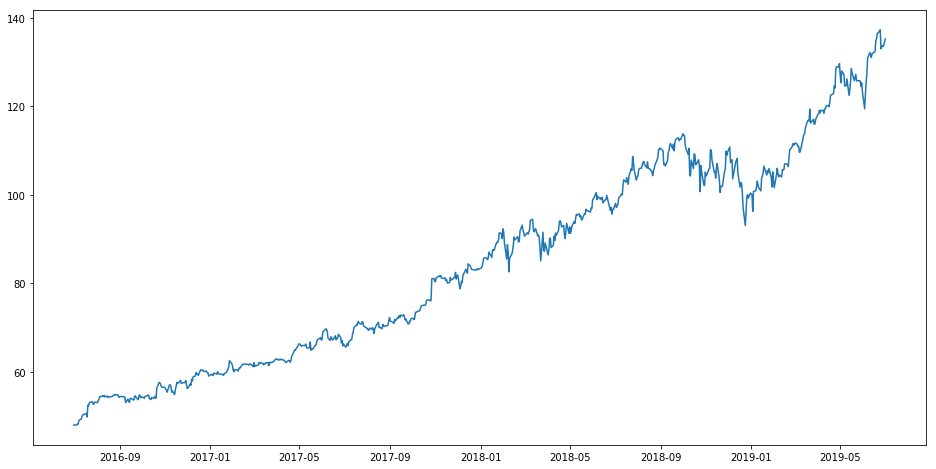

In [53]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

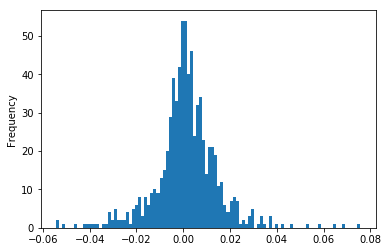

In [54]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

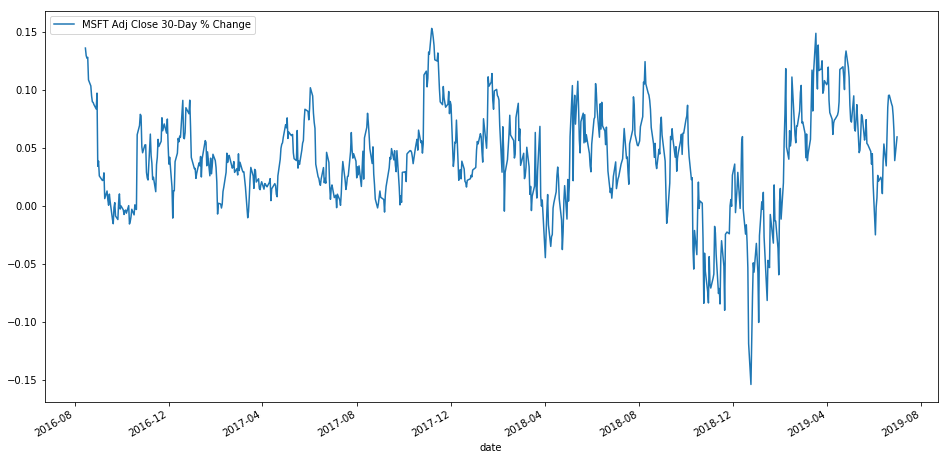

In [55]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(30).plot(label='MSFT Adj Close 30-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.201898
5d_close_future_pct     -0.201898             1.000000


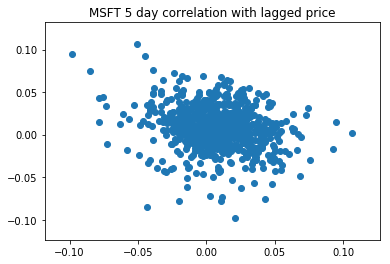

In [57]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.001928
5d_close_future_pct -0.001928             1.000000


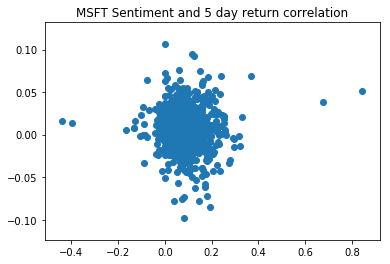

In [58]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000            -0.148377
1d_close_future_pct     -0.148377             1.000000


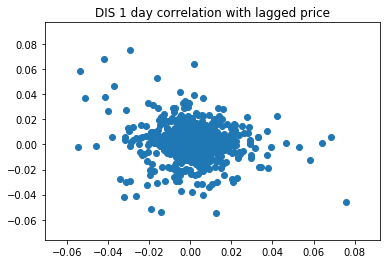

In [59]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000             0.019096
1d_close_future_pct  0.019096             1.000000


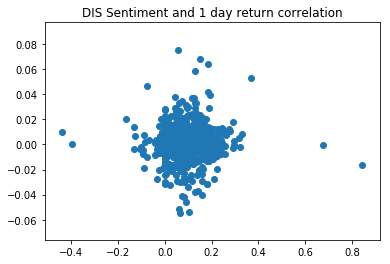

In [60]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct                1.0000               -0.0485
30d_close_future_pct        -0.0485                1.0000


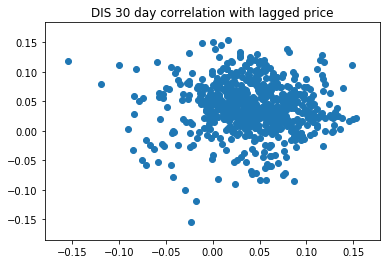

In [61]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('DIS 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound              1.000000             -0.101841
30d_close_future_pct -0.101841              1.000000


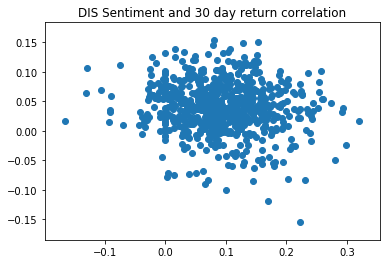

In [62]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [63]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [64]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 65 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [65]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [66]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [67]:
feature_names = ['30d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:
    
# Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['30d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [68]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


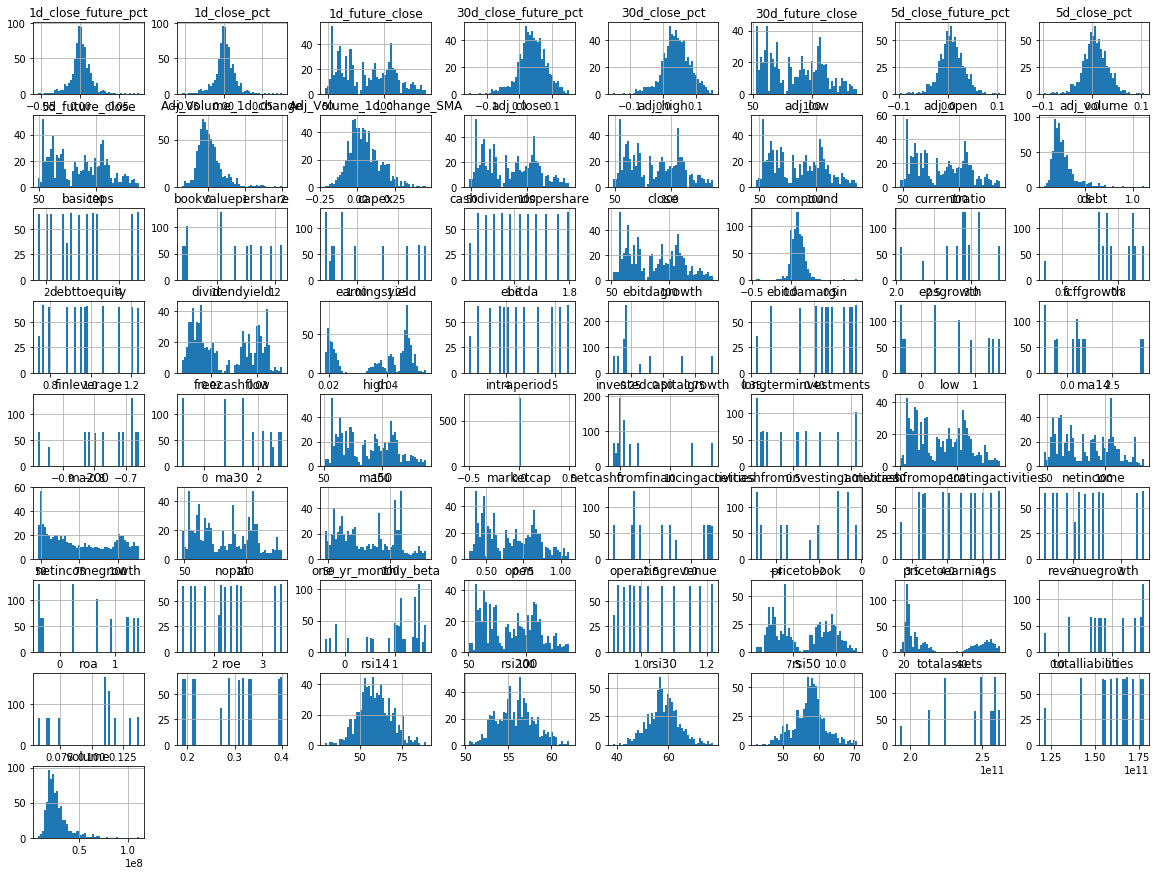

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [70]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 67 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [71]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
       '1d_clos

In [72]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['30d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['30d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                30d_close_future_pct  30d_close_pct      ma14  \
30d_close_future_pct                        1.000000      -0.033563 -0.034884   
30d_close_pct                              -0.033563       1.000000  0.059177   
ma14                                       -0.034884       0.059177  1.000000   
rsi14                                      -0.139145       0.751613 -0.040333   
ma30                                       -0.041136       0.016476  0.998177   
rsi30                                      -0.145745       0.778330 -0.162989   
ma50                                       -0.044622      -0.018047  0.994941   
rsi50                                      -0.160244       0.711016 -0.243152   
ma200                                       0.006700      -0.014251  0.982297   
rsi200                                     -0.175348       0.464882  0.146343   
compound                                   -0.103192       0.001350  0.065266   
marketcap                   

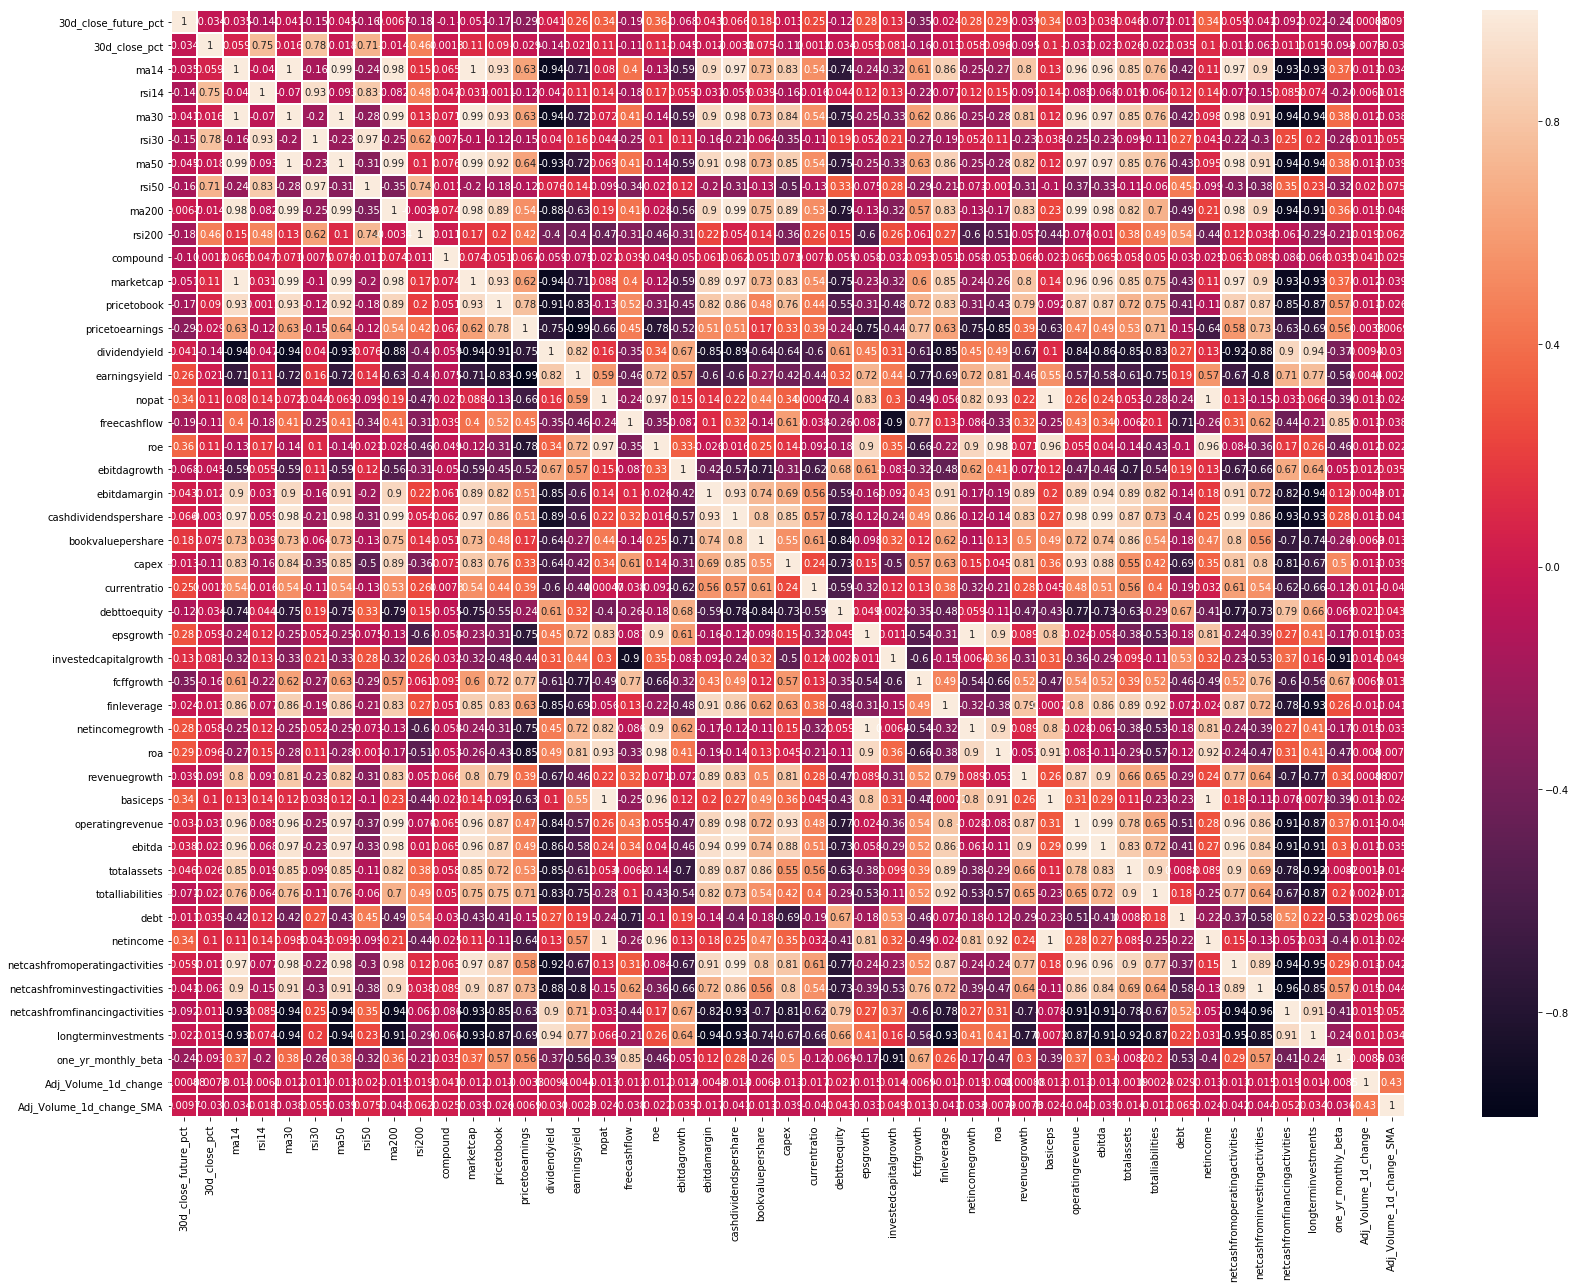

<Figure size 432x288 with 0 Axes>

In [73]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [74]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 29 columns


In [75]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'rsi50', 'rsi200',
       'compound', 'earningsyield', 'freecashflow', 'ebitdagrowth',
       'bookvaluepershare', 'currentratio', 'debttoequity', 'fcffgrowth',
       'netincomegrowth', 'revenuegrowth', 'totalliabilities', 'debt',
       'netincome', 'one_yr_monthly_beta', '5d_close_future_pct',
       '5d_close_pct', '1d_close_future_pct', '1d_close_pct',
       '30d_future_close', '30d_close_future_pct', '30d_close_pct',
       'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [76]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [77]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [78]:
#30 day future return features
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '30d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [79]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['30d_close_future_pct']





In [80]:
targets.describe()

count    694.000000
mean       0.039334
std        0.042947
min       -0.154034
25%        0.016396
50%        0.040218
75%        0.065205
max        0.153017
Name: 30d_close_future_pct, dtype: float64

In [81]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [82]:
train_size

555

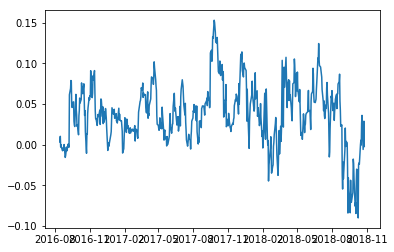

In [83]:
plt.plot(train_targets)

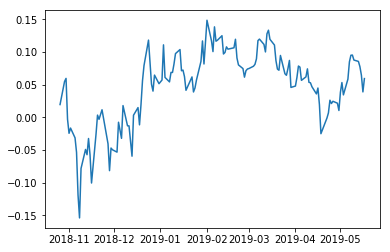

In [84]:
plt.plot(test_targets)

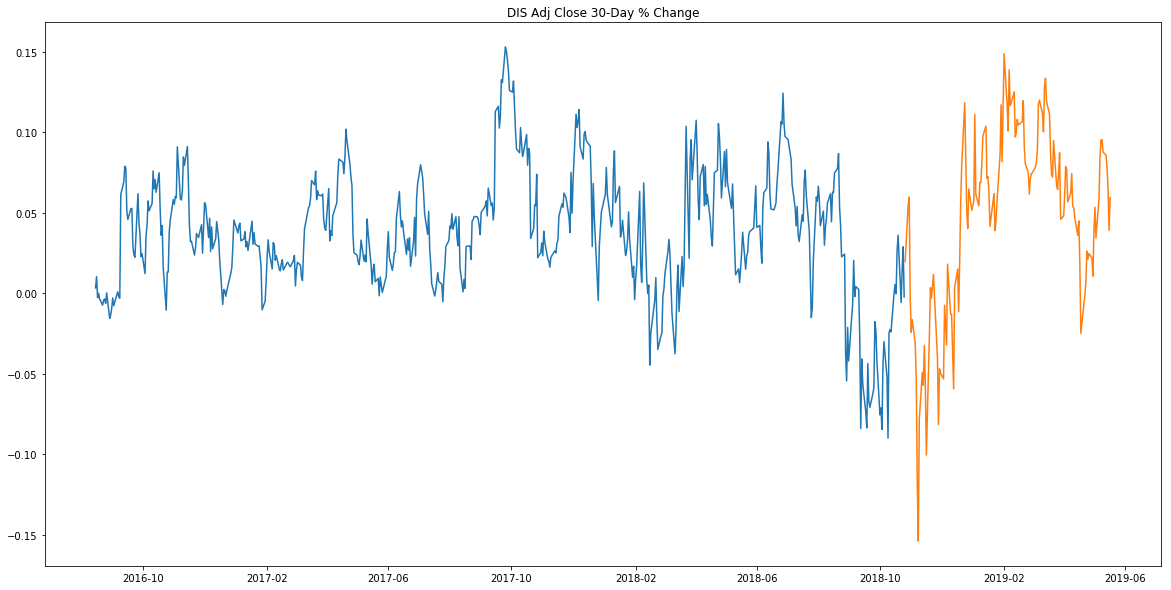

In [85]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.title('DIS Adj Close 30-Day % Change')
plt.show()

In [86]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.668
Model:                              OLS   Adj. R-squared:                  0.654
Method:                   Least Squares   F-statistic:                     48.64
Date:                  Sun, 01 Sep 2019   Prob (F-statistic):          4.76e-112
Time:                          19:59:10   Log-Likelihood:                 1333.3
No. Observations:                   555   AIC:                            -2621.
Df Residuals:                       532   BIC:                            -2521.
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

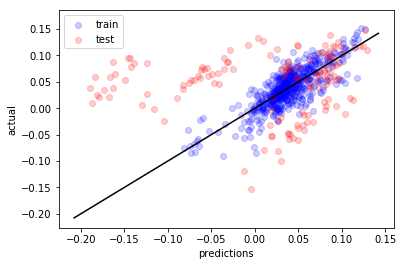

In [87]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [88]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [89]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.6853528480243665
-0.19150554546845378


In [90]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.00045437426427005415
0.004003906364765193


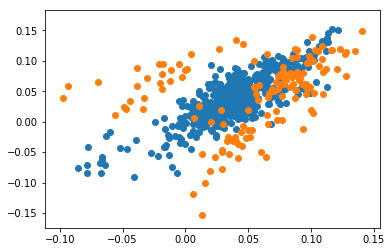

In [91]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [93]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [94]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [95]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.6672452885034946
-25.742977714068363


In [96]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.00048052294854500187
0.08986645432693621
Train Root mean squared error: 0.021920833664461802
Test Root mean squared error: 0.2997773412500288


In [97]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

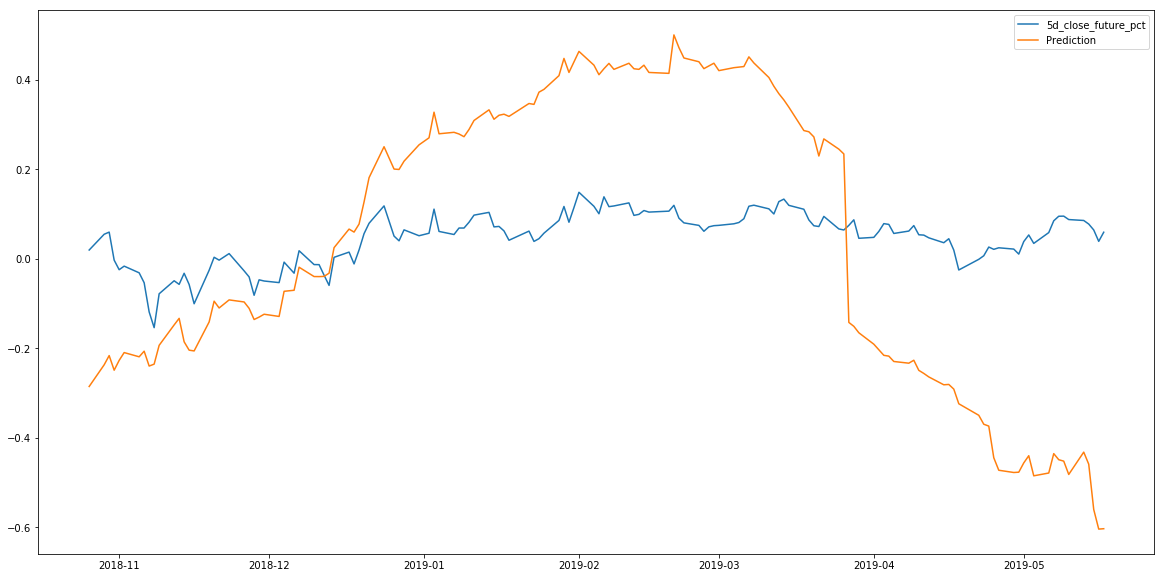

In [98]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

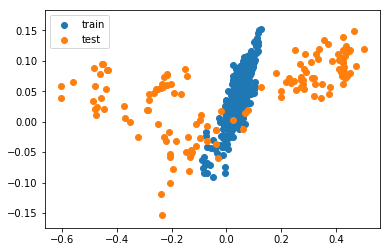

In [99]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -2.6% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [102]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.02578443949919773
0.08986645432693621
0.2997773412500288


In [104]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([5,4,3,2,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge(normalize=True)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(train_features, train_targets)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([5.e+00, 4.e+00, 3.e+00, 2.e+00, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
-0.3982622739611812
5.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [105]:
from sklearn.linear_model import Ridge
alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)
test_scores

[-0.023869177838482303,
 -0.01689802892139447,
 -0.007878841457970465,
 -0.006280041163162942,
 -0.006740718302407966,
 -0.014813377841073505,
 -0.02758199915828774,
 -0.05759324942773736,
 -0.14636238560282333,
 -0.6120375383467398,
 -1.635614690458028,
 -1.5458851515052725,
 -2.587050682043761,
 -1.450523461179858e+21]

In [106]:
from sklearn.linear_model import Ridge



ridgeReg = Ridge(alpha=10, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.07535900343027768
Test r2: -0.01689802892139447


In [107]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=10, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.492610852631018
Test r2: -0.01689802892139447


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [108]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=3,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.6672452885034946
Test r2: -25.742977714068363
0.08986645432693621
0.2997773412500288


In [109]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(X_calib, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  2

R2: -23.209
MSE: 0.081
SEP: 0.268
RPD: 0.216
Bias: 0.097


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


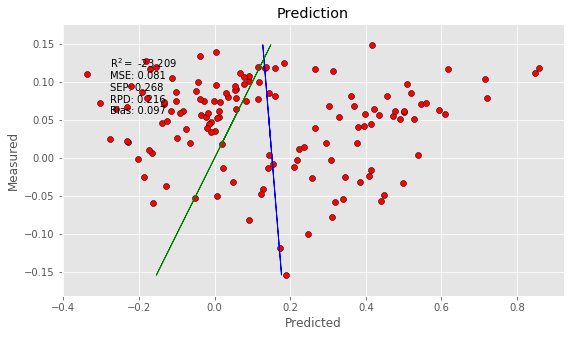

In [111]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[ 60.31  71.8   78.23  83.73  88.18  91.33  94.18  95.99  97.59  98.47
  98.83  99.14  99.45  99.67  99.79  99.87  99.92  99.96  99.98  99.99
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.  ]
0.635404682215629
-0.022051909051093777
0.0034344784708166803
0.058604423645461104


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


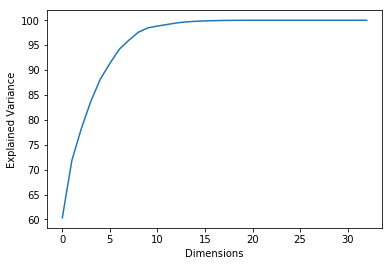

In [112]:
### PCA

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=20)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.999995534215813
-1.741222716171524


In [114]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.999995534215813
-1.3174575987615023


In [115]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.49012785358641964
-0.8006626015651401 

max_depth= 5
0.6878834944812455
-0.1576961081554351 

max_depth= 10
0.9489157648258918
-0.5618163448470703 



In [116]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
0.0428335988427726
-0.25629460278728344 

max_depth= 5
-0.6835047364790544
0.42873731369895507 

max_depth= 10
-1.1910833592114196
0.06748903663801831 



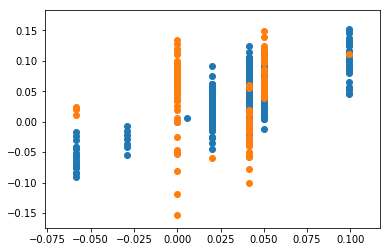

In [117]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.977842812459272
-1.3196357754092305


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [119]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.6841848903856897 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [120]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.5574719889709265
-0.6841848903856897


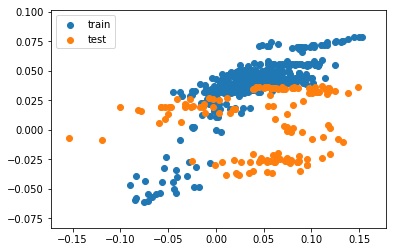

In [121]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

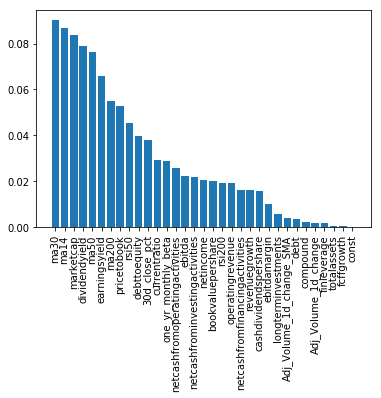

In [122]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [123]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.644034329309904
-0.27693845225486724


In [124]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

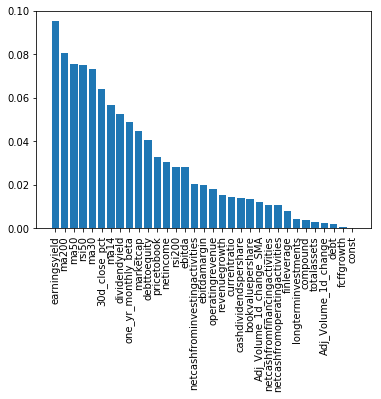

In [125]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


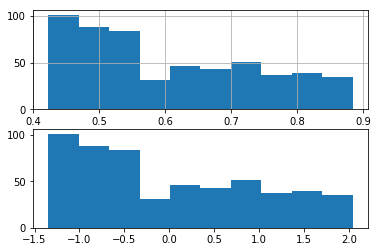

In [126]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [127]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.8685877944586796
0.35636311565636447

n_neighbors = 3
train, test scores
0.8237142629272364
0.3962655004733302

n_neighbors = 4
train, test scores
0.7915403447576989
0.43431110416299223

n_neighbors = 5
train, test scores
0.7484021908445888
0.4174079666435293

n_neighbors = 6
train, test scores
0.7266005488367338
0.4162228710825643

n_neighbors = 7
train, test scores
0.7147323163832731
0.4224773151240905

n_neighbors = 8
train, test scores
0.7039579315755251
0.4282992126621006

n_neighbors = 9
train, test scores
0.6847346174122045
0.43921746022211317

n_neighbors = 10
train, test scores
0.6672173745871433
0.44566822146218765

n_neighbors = 11
train, test scores
0.6489295576458047
0.4520551442048929

n_neighbors = 12
train, test scores
0.6354037632657122
0.4517727205883634

n_neighbors = 13
train, test scores
0.624588077760452
0.4564550734034425

n_neighbors = 14
train, test scores
0.6144241310575562
0.4495618966271899

n_neighbors = 15
train, test s

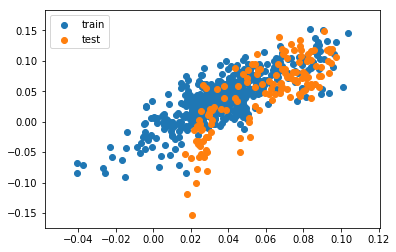

In [128]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [129]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
555/555 [==============================] - 0s 356us/step - loss: 0.0460
Epoch 2/25
555/555 [==============================] - 0s 22us/step - loss: 0.0097
Epoch 3/25
555/555 [==============================] - 0s 24us/step - loss: 0.0050
Epoch 4/25
555/555 [==============================] - 0s 22us/step - loss: 0.0034
Epoch 5/25
555/555 [==============================] - 0s 23us/step - loss: 0.0023
Epoch 6/25
555/555 [==============================] - 0s 23us/step - loss: 0.0021
Epoch 7/25
555/555 [==============================] - 0s 32us/step - loss: 0.0022
Epoch 8/25
555/555 [==============================] - 0s 26us/step - loss: 0.0016
Epoch 9/25
555/555 [==============================] - 0s 23us/step - loss: 0.0014
Epoch 10/25
555/555 [==============================] - 0s 27us/step - loss: 0.0013
Epoch 11/25
555/555 [==============================] - 0s 28us/step - loss: 0.0014
Epoch 12/25
555/555 [==============================] - 0s 24us/step - loss: 0.0015
Epoch 13/25


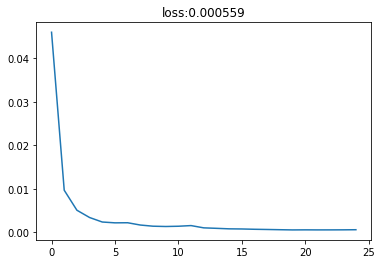

In [130]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.7027766751888125
-13.201822370976059


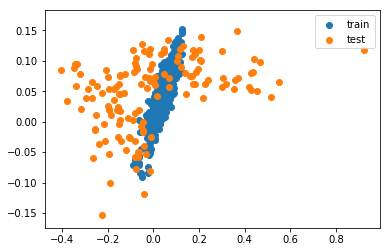

In [131]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [132]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c37ced840>


Epoch 1/25
555/555 [==============================] - 0s 315us/step - loss: 16.3337
Epoch 2/25
555/555 [==============================] - 0s 24us/step - loss: 2.5586
Epoch 3/25
555/555 [==============================] - 0s 25us/step - loss: 0.7586
Epoch 4/25
555/555 [==============================] - 0s 28us/step - loss: 0.4105
Epoch 5/25
555/555 [==============================] - 0s 33us/step - loss: 0.2803
Epoch 6/25
555/555 [==============================] - 0s 26us/step - loss: 0.2103
Epoch 7/25
555/555 [==============================] - 0s 28us/step - loss: 0.1787
Epoch 8/25
555/555 [==============================] - 0s 31us/step - loss: 0.1475
Epoch 9/25
555/555 [==============================] - 0s 29us/step - loss: 0.1451
Epoch 10/25
555/555 [==============================] - 0s 28us/step - loss: 0.1132
Epoch 11/25
555/555 [==============================] - 0s 30us/step - loss: 0.0983
Epoch 12/25
555/555 [==============================] - 0s 34us/step - loss: 0.0828
Epoch 13/25

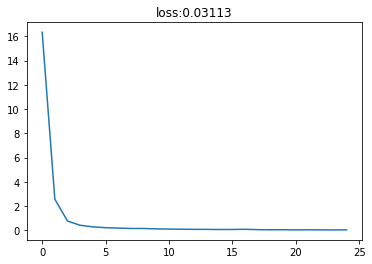

In [133]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-5.124990768300414
-19.513438014446468


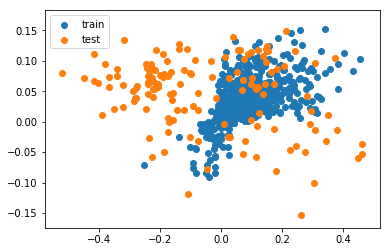

In [134]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
555/555 [==============================] - 0s 439us/step - loss: 0.1403
Epoch 2/25
555/555 [==============================] - 0s 41us/step - loss: 0.0555
Epoch 3/25
555/555 [==============================] - 0s 33us/step - loss: 0.0343
Epoch 4/25
555/555 [==============================] - 0s 31us/step - loss: 0.0287
Epoch 5/25
555/555 [==============================] - 0s 32us/step - loss: 0.0223
Epoch 6/25
555/555 [==============================] - 0s 29us/step - loss: 0.0162
Epoch 7/25
555/555 [==============================] - 0s 29us/step - loss: 0.0128
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0115
Epoch 9/25
555/555 [==============================] - 0s 23us/step - loss: 0.0088
Epoch 10/25
555/555 [==============================] - 0s 31us/step - loss: 0.0082
Epoch 11/25
555/555 [==============================] - 0s 36us/step - loss: 0.0075
Epoch 12/25
555/555 [==============================] - 0s 27us/step - loss: 0.0076
Epoch 13/25


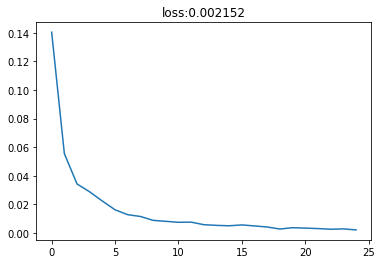

In [135]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [136]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.21559785 -0.19639474 -0.1682182  -0.18358721 -0.17090793]


0.17202443151561686
-4.5119827053378145


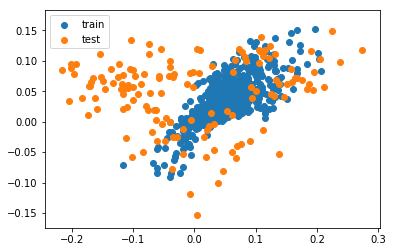

In [137]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()